#  Airbnb 

IT is a hospitality company that runs an online marketplace for renting and leasing short-term lodging, primarily homestays, or tourism experiences. The company does not own any of the real estate listings, nor does it host events; it acts as a broker, receiving commissions from each booking. 


It is interested in developing a pricing service for its users that will compute a recommended price based on the features of a listing. You are approached by Airbnb to develop a model for predicting nightly prices of Airbnb listings based on state-of-art techniques from statistical machine learning.

### Problem Statement:

1) To predict the nightly prices for different accomodations.

2) To check factors that influences the price.

3) Does the grographical location plays an important role in deciding the price factor.

4) What is a difference of price between host and a super host


In [ ]:
#### Problem statement is not much appealing. Try to modify it.

### Data Description:

Id- Serial no.

price- price per night

host_is_superhost: T-True the host is  super-host, f-False the host is not a super-host ( A superhost is a a mark of quality, requiring various conditions to be met)

host_total_listings_count:how many listings the host is responsible for in total.

host_identity_verified: t- True, the host identity is verified, f-False, identity not verified (e.g. by verifying government ID, a phone number and an email address)

latitude: geographical location of the place with respect to latitude.

longitude: geographical location of the place with respect to longitute.

property_type: type of property (e.g. apartment, room, boat, cabin, guesthouse, hostel etc.)

room_type: Type of room (e.g. sharing, private, entire house etc)

accommodates: total no. of people the property can accommodate.

bathrooms: no. of bathrooms.

bedrooms: no. of bedrooms

beds:no. of beds. 

security_deposit: security deposit amount.

cleaning_fee: fee charged for cleaning.

extra_people: extra people charges.

minimum_nights: duration of stay minimum nights. 

maximum_nights: duration of stay maximum nights.

number_of_reviews: total no. of reviews.

(review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication,review_scores_location, review_scores_value)-Review ratings for each category (accuracy, cleanliness, check-in, communication, location, value and overall total)

instant_bookable- t-True booking can be done instantly, f-False booking cannot be done instantly.

is_business_travel_ready: is it ready for stay related to business purpose.

cancellation_policy: cancellation policy of the host (eg. strict, moderate, flexible)

reviews_per_month: monthly review scores

### Target Variable: 

Price: This variable displayes the price per night of different host

## Importing and Data Inspection

####  import important libraries and reading the dataset

In [1]:
import pandas as pd     # data processing
import numpy as np      # linear algebra
import matplotlib.pyplot as plt  # data visualization
%matplotlib inline
import seaborn as sns           # seaborn is another library for visualization of data
colour=sns.color_palette()

In [2]:
air_df=pd.read_csv('D:\\datas\\airbnb_train.csv') # reading the data set

In [3]:
print(air_df.shape)  #checking the data dimensions

(1000, 30)


the dataset has 1000 observations with 30 variables

#### Data Inspection

In [4]:
pd.set_option('display.max_column',30) # to display all the columns of the dataset, we set max column limit
air_df.head()

,Id,price,host_is_superhost,host_total_listings_count,host_identity_verified,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,security_deposit,cleaning_fee,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,reviews_per_month
0,0,150,f,22.0,t,-33.846469,151.205171,Apartment,Entire home/apt,2,1.0,1,1.0,500.0,330.0,0,7,1125,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,strict,0.53
1,1,66,f,1.0,t,-33.895736,151.173529,Apartment,Private room,2,1.5,1,1.0,NaN,NaN,0,21,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,f,flexible,NaN
2,2,325,t,1.0,t,-33.879322,151.222408,House,Entire home/apt,4,2.0,2,2.0,500.0,180.0,0,3,90,21,99.0,10.0,10.0,10.0,10.0,10.0,9.0,f,f,moderate,2.38
3,3,145,f,1.0,f,-33.856874,151.149600,House,Entire home/apt,6,1.5,3,4.0,0.0,80.0,0,4,1125,3,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,flexible,1.96
4,4,200,f,6.0,t,-33.907150,151.178552,House,Entire home/apt,4,1.0,2,2.0,350.0,85.0,50,2,30,22,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,moderate,2.73


In [30]:
air_df.info()  #to get a brief summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
Id                             1000 non-null int64
price                          1000 non-null int64
host_is_superhost              998 non-null object
host_total_listings_count      998 non-null float64
host_identity_verified         998 non-null object
latitude                       1000 non-null float64
longitude                      1000 non-null float64
property_type                  1000 non-null object
room_type                      1000 non-null object
accommodates                   1000 non-null int64
bathrooms                      997 non-null float64
bedrooms                       1000 non-null int64
beds                           998 non-null float64
security_deposit               574 non-null float64
cleaning_fee                   693 non-null float64
extra_people                   1000 non-null int64
minimum_nights                 1000 non-null int64
maximum_nights  

from the above information we notice the following:

1) the dataset has float, int and object type datas # data types

2) the datas in the object type variable are boolean values i.e True or false

3) We also notice a lot of missing value with some variables, we shall go for a deeper analysis for the same.

In [7]:
air_df.describe().T #statistical description of the continuous variables

,count,mean,std,min,25%,50%,75%,max
Id,1000.0,499.500000,288.819436,0.000000,249.750000,499.500000,749.250000,999.000000
price,1000.0,145.521000,91.428523,18.000000,75.000000,120.000000,195.750000,449.000000
host_total_listings_count,998.0,7.044088,27.234486,1.000000,1.000000,1.000000,2.000000,205.000000
latitude,1000.0,-33.866773,0.068062,-34.092546,-33.899661,-33.884990,-33.843008,-33.401800
longitude,1000.0,151.205647,0.080778,150.651014,151.182542,151.217358,151.261443,151.338687
accommodates,1000.0,2.988000,1.681869,1.000000,2.000000,2.000000,4.000000,16.000000
bathrooms,997.0,1.255266,0.488096,0.000000,1.000000,1.000000,1.500000,4.000000
bedrooms,1000.0,1.406000,0.797371,0.000000,1.000000,1.000000,2.000000,5.000000
beds,998.0,1.748497,1.122342,0.000000,1.000000,1.000000,2.000000,9.000000
security_deposit,574.0,395.393728,466.069393,0.000000,150.000000,300.000000,500.000000,6000.000000


from the above statistical description we can see that:

1) host_total_listings_count, bathrooms, beds, security_deposit, cleaning_fee and reviews on different category have missing values.

2) variables like host_total_listing_counts, security_deposit, extra_people, maximum_nights and number_of_reviews seems to have outliers.

we need detailed investigation into outliers and missing values situations in order to take the necessary steps

In [8]:
air_df.describe(include=object)  #Dataset description for object variable

,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,is_business_travel_ready,cancellation_policy
count,998,998,1000,1000,1000,1000,1000
unique,2,2,19,3,2,2,3
top,f,f,Apartment,Entire home/apt,f,f,strict
freq,905,509,651,589,693,976,392


We can see that most variables has only two levels i.e true or false, some varibles like room_type and cancellation_policy has 3 levels and variable property_type has 19 levels.

host_is_superhost and host_identity_verified have 2 missing values each

In [9]:
num_cat=[ 'accommodates', 'bathrooms', 'bedrooms','beds', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin','review_scores_location', 'review_scores_value']

In [10]:
for var in num_cat:       #changed the variables categorical in nature into categorical dtype 
    air_df[var] = air_df[var].astype('category')

## Data Pre-Processing

#### Missing Value Imputation

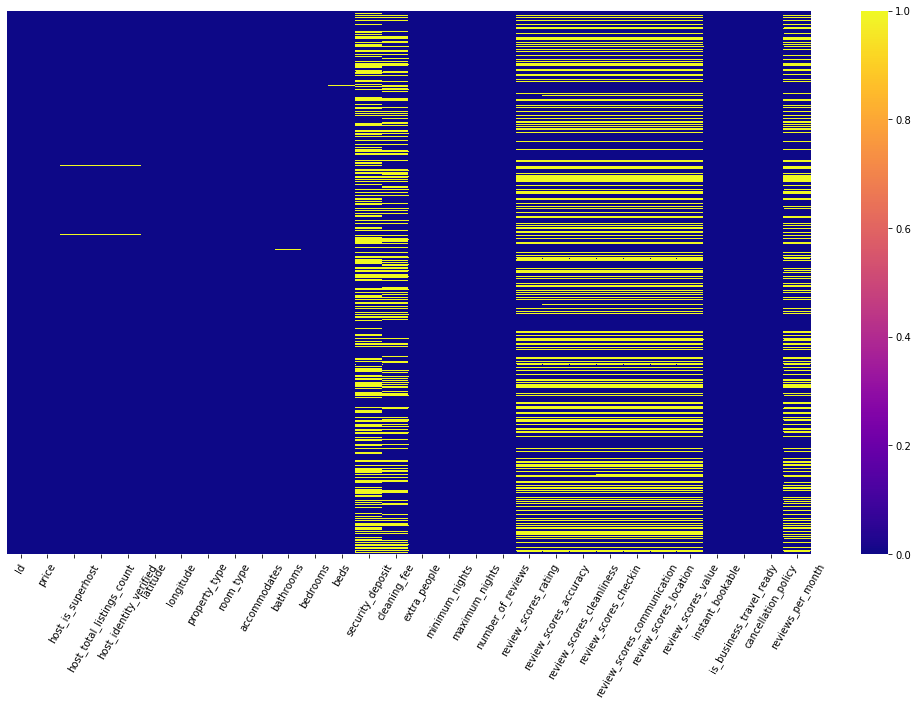

In [12]:
plt.figure(figsize=(18,10))   #graphical presentation of missing values in the dataset
sns.heatmap(air_df.isnull(),yticklabels=False, xticklabels=air_df.columns, cmap='plasma') 
plt.xticks(rotation=60)
plt.show()

In [13]:
air_df.isnull().sum()    # total no. of null values in each column

Id                               0
price                            0
host_is_superhost                2
host_total_listings_count        2
host_identity_verified           2
latitude                         0
longitude                        0
property_type                    0
room_type                        0
accommodates                     0
bathrooms                        3
bedrooms                         0
beds                             2
security_deposit               426
cleaning_fee                   307
extra_people                     0
minimum_nights                   0
maximum_nights                   0
number_of_reviews                0
review_scores_rating           340
review_scores_accuracy         342
review_scores_cleanliness      342
review_scores_checkin          344
review_scores_communication    343
review_scores_location         344
review_scores_value            344
instant_bookable                 0
is_business_travel_ready         0
cancellation_policy 

In [14]:
col_null=[]
percentage=[]
counts=[]
for col in air_df.columns:
    if air_df[col].isnull().sum()!=0:
        null=air_df[col].isnull().sum()
        percent=round((air_df[col].isnull().sum()/air_df[col].isnull().count())*100,2)
        percentage.append(percent)
        col_null.append(col)
        counts.append(null)

In [15]:
null_summary=pd.DataFrame({'columns': col_null, 'null_values': counts, 'percentage_null_values':percentage })
null_summary.sort_values(by='null_values', ascending=False)

,columns,null_values,percentage_null_values
5,security_deposit,426,42.6
10,review_scores_checkin,344,34.4
12,review_scores_location,344,34.4
13,review_scores_value,344,34.4
11,review_scores_communication,343,34.3
8,review_scores_accuracy,342,34.2
9,review_scores_cleanliness,342,34.2
7,review_scores_rating,340,34.0
14,reviews_per_month,311,31.1
6,cleaning_fee,307,30.7


from the above information we can see  that: 

security_deposit- has 42.6 % null values with 426 missing information 

review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location, review_scores_value--has 34.4% missing values with 344,342 and 340 missing information in each column

reviews_per_month has 31.1% missing values with 311 missing information and cleaning_fee has 30.7% missing values with 307 missing information 

In [16]:
#imputing missing values for continuous variables
for num in air_df.select_dtypes(('float64', 'int64')):
    if air_df[num].isnull().sum()!=0:
        air_df[num]=air_df[num].fillna(air_df[num].median())

In [17]:
#imputing the missing value of a categorical variables
for col in air_df.select_dtypes('object'):
    air_df[col]=air_df[col].fillna(air_df[col].value_counts().index[0])

In [19]:
air_df=air_df.drop('Id', axis=1) # we do not need Id for the analysis

#### Outlier Analysis

In some cases, the values of the variables fall in the extreme range, which will impact the model fitting
 in an undesirable way. These values are called outliers that fall ouside the range of (Q1-1.5 * IQR) and (Q3+1.5 * IQR)

IQR- Inter-quartile range,
Q1- first quartile 
Q3-third quartile

sometimes  these values are random, but sometimes it is not random it adds certain information to the data. In this cases we cannot drop these outliers. We term them as business outliers.

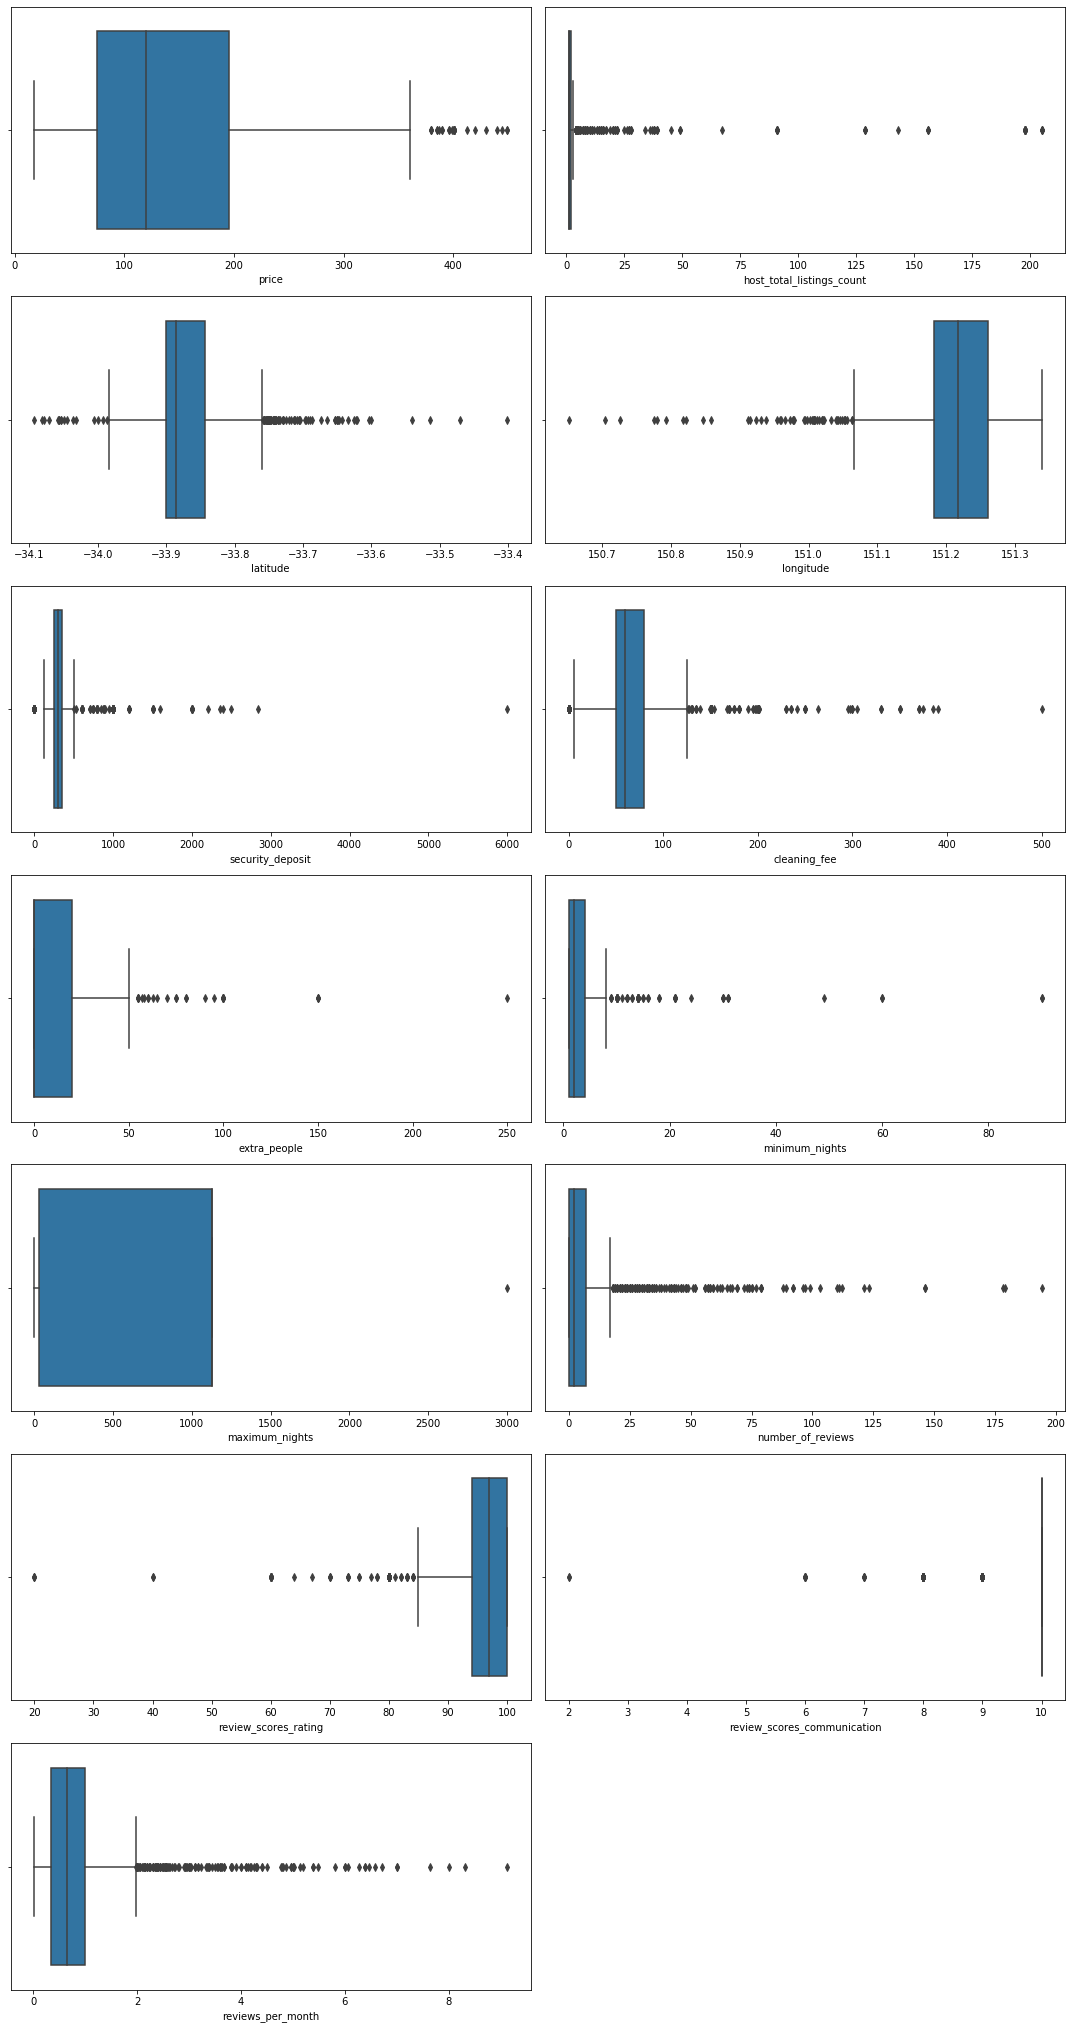

In [20]:
plt.figure(figsize=(15,60))
n=1
for column in air_df.select_dtypes(('int64', 'float64')):
    plt.subplot(15,2,n)
    sns.boxplot(x=air_df[column])
    plt.tight_layout()
    n=n+1
plt.show()

host_total_listings: we see some hosts have listing more than 50. this can be business outliers,

accommodates: some host do have provisions to accommodate larger groups. similarly with bathrooms, bedrooms and beds variables

maximun_nights_stay: 3000 nights stay cannot be accounted practically. we can remove the outlier in maximum nights. 
minimum_nights: in general minimum night stay is mostly  between 1 - 2 , inorder to avoide unnecessary information loss we shall  drop the data above 40 minimum nights

security deposit, cleaning fee, extra people charges and reviews seem to have outlier that can be potentially business outliers. 
We can always come back to outliers analysis, if we face any accuracy problem while fitting the models.

In [21]:
(air_df['minimum_nights'].values>40).sum()  # how many data points are above 40

5

In [22]:
air_df=air_df[air_df['minimum_nights']<40]

In [23]:
air_df=air_df[air_df['maximum_nights']<1500]

In [24]:
air_df.shape

(994, 29)

Let's convert all the object variables into categorical variables 

In [25]:
for col in air_df.select_dtypes('object'):
    air_df[col]=air_df[col].astype('category')
print(air_df.dtypes) 

price                             int64
host_is_superhost              category
host_total_listings_count       float64
host_identity_verified         category
latitude                        float64
longitude                       float64
property_type                  category
room_type                      category
accommodates                   category
bathrooms                      category
bedrooms                       category
beds                           category
security_deposit                float64
cleaning_fee                    float64
extra_people                      int64
minimum_nights                    int64
maximum_nights                    int64
number_of_reviews                 int64
review_scores_rating            float64
review_scores_accuracy         category
review_scores_cleanliness      category
review_scores_checkin          category
review_scores_communication     float64
review_scores_location         category
review_scores_value            category


when python doesn't understand the nature of the values in a variable, it assigns the dtype of the variable as 'Object' now, during the data inspection we understood that the object variable are actually categorical with different levels like (True or false) or (strict, flexible, moderate) etc. so we'll changed the 'object' dtype to 'categorical' dtype 

## Exploratory Data Analysis

#### part 1: Univariate Analysis

lets bin the price variables for easy interpretation through visualization

In [26]:
bins=[0,75,100,150,250,500]
labels=['very low', 'low', 'moderate', 'High', 'veryhigh']
air_df['price_bins']=pd.cut(air_df['price'], bins=bins, labels=labels)
air_df['price_bins']=air_df['price_bins'].astype('category')

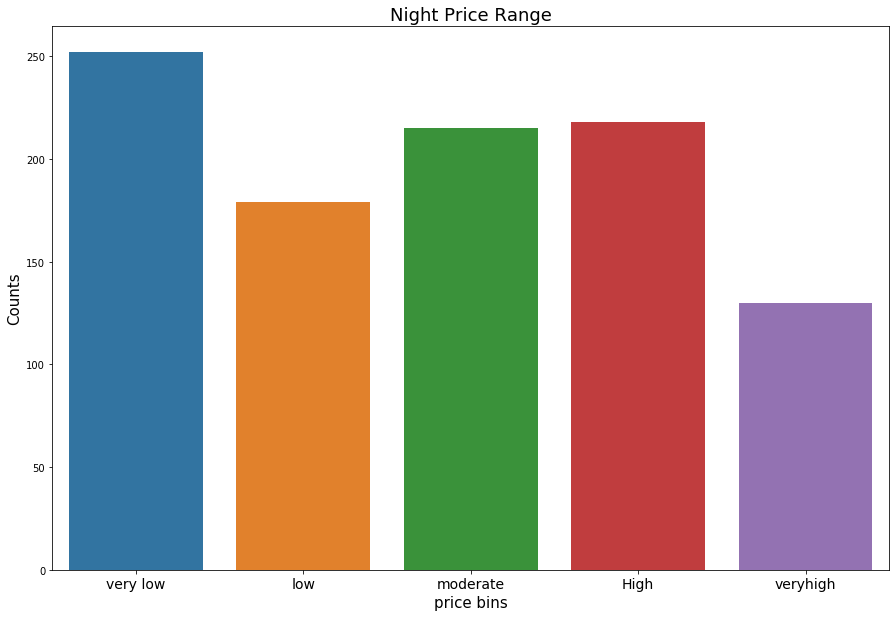

In [33]:
plt.figure(figsize=(15,10))
sns.countplot(x='price_bins', data=air_df)
plt.xlabel('price bins', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.title('Night Price Range', fontsize=18)
plt.xticks(fontsize=14)
plt.show()

from the above graph we can see that the nightly prices are right skewed, this means that the mean will be higher than the mode. Around 250 hosts charges night price <75, around 180 hosts charge between 75-100, and 220 host charge between 100-150. only 70 hosts charge between 300-500

Continuous variable

univariate analysis for price is already done above. univariate analysis of longitude and latitude is not required

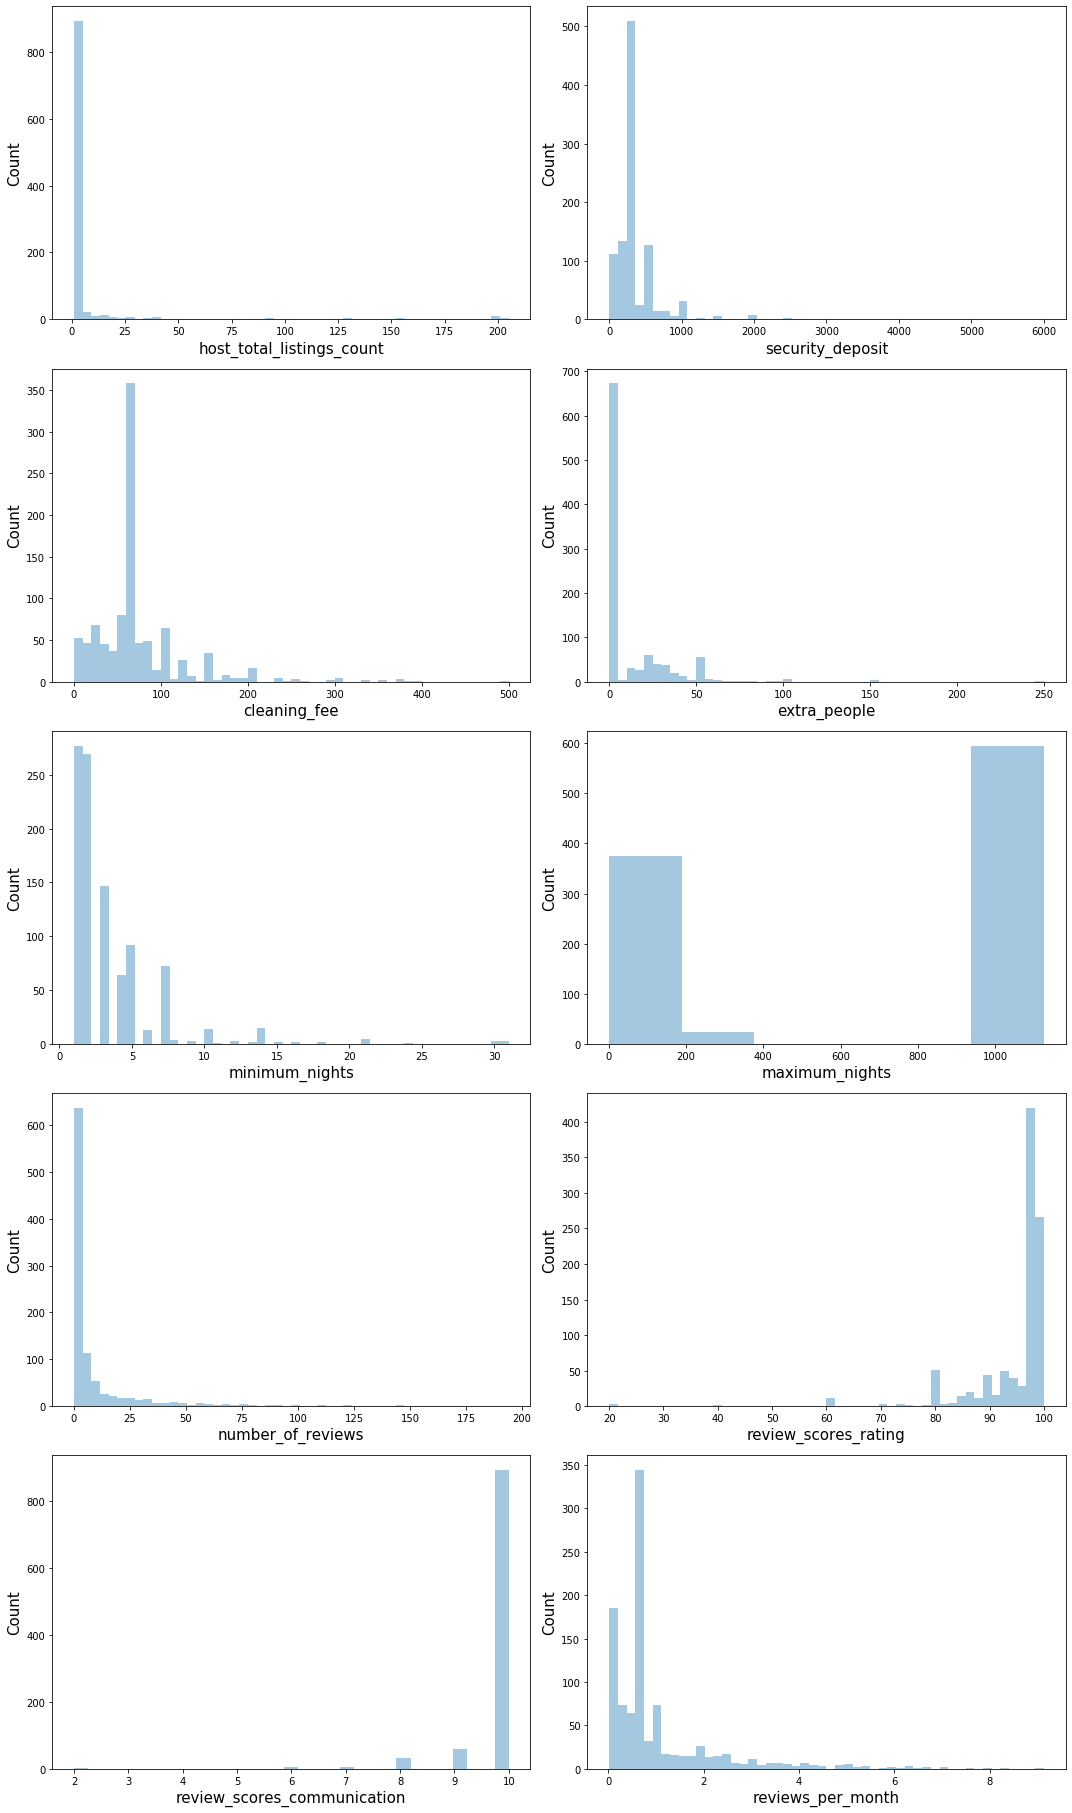

In [41]:
plt.figure(figsize=(15,60)) 
n=1
for col in air_df.select_dtypes(('float64', 'int64')):
    if (col!='price' and col!='longitude' and col!='latitude'):   
        plt.subplot(12,2,n)
        sns.distplot(air_df[col], kde=False)
        plt.ylabel('Count', fontsize=15)
        plt.xlabel(col, fontsize=15)
        plt.tight_layout()
        n=n+1
plt.show()

host_total_listings_count: We see maximum no. of hotels have listings less than 10. only a very few have listings more than 15.

security_deposit: we see a maximum no. of places charging security deposit between 0 to 1000. 6000 as security deposit is way too high. we can make a note on the same if we face any problem while model fitting we can always come back to treat the outliers.
similarly with cleaning fee, extra people fees seems to have some business outliers.
We can also see that variables like accommodates, bathrooms, bedrooms, beds, review_score(accuracy, cleaniness, checkin, location, value are all categorical in nature

step:7 categorical variables

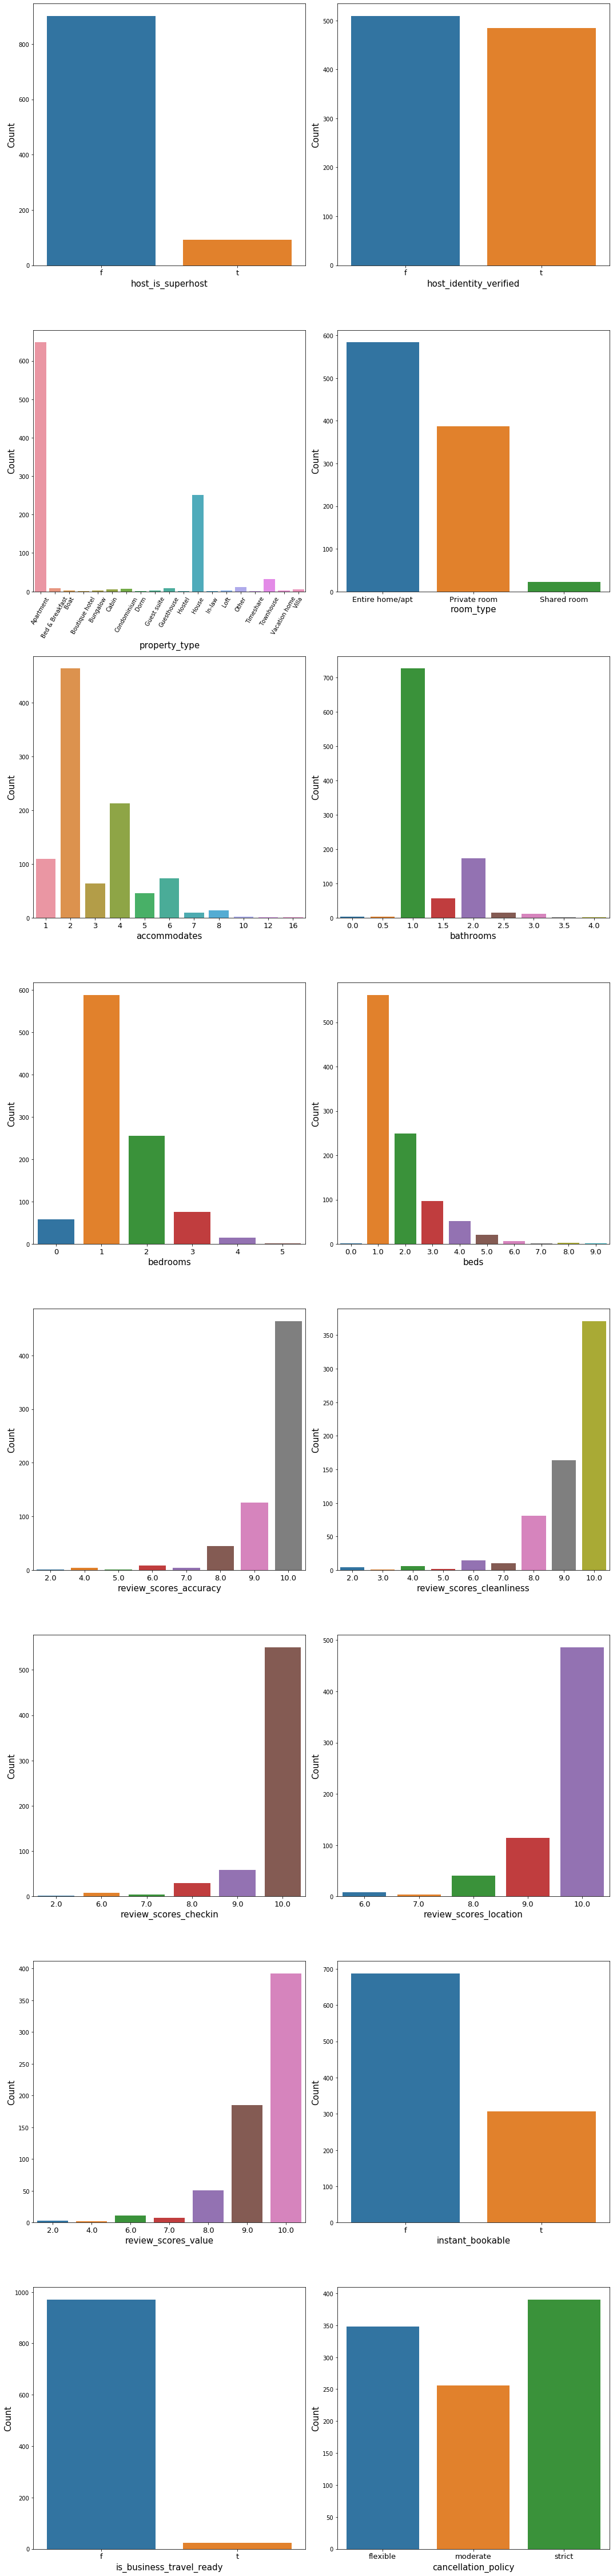

In [42]:
plt.figure(figsize=(15,70))
n=1
for col in air_df.select_dtypes('category'):
    if col!='price_bins':
        plt.subplot(9,2,n)
        sns.countplot(x=col, data=air_df)
        plt.ylabel('Count', fontsize=15)
        plt.xlabel(col,fontsize=15)
        plt.xticks(fontsize=13)
        plt.tight_layout()
        n=n+1
        if col=='property_type':                   # changing the orientation of xticks only for property_type variables 
            plt.xticks(rotation=60, fontsize=10)
plt.show()

host_is_superhost: We can see that more than 90% of places are not a superhost.

host_identity_verified: around 500 places identity is not verified. i.e only 50% of places have their identity verified.

property_type: A large no. of places are apartments and houses. 'room_type' and 'property_type' are interrelated, we notice that a large no of apartment and houses are given on rent or leasing entirely, only is some properties we see the provision of private rooms and even less no. of shared room provisions. This can be because most hosts prefer to have and give some privacy. 

accommodates: approx 500 places can accommodate only 2 people and approx 230 places can accomodate 4 people. This means we have 
very limited options for group bookings. 
since a large no. of places can accommadate only 2 people, we also see they have amenities like 1 bathroom, 1 bedrooms and 1 or 2 beds to suppoort their guests.

0.5 bathroom -only consist of a sink and a toilet- it does not have any bathing facility

almost 500 hotels have 10 on 10 review scores for accuracy, location, cleaniness etc
Very less no. of places can be instantly booked, and even lesser no. of places are ready for business travelers. Most of the host have a strict cancellation policy while considerable no. of hosts are flexible with it.

#### Part :2 Bi-variate Analysis

Analysis of independent variables with respect to target

first lets check the correlation of continious variable w.r.t price

graphical representation of the correlation between variables using heatmap

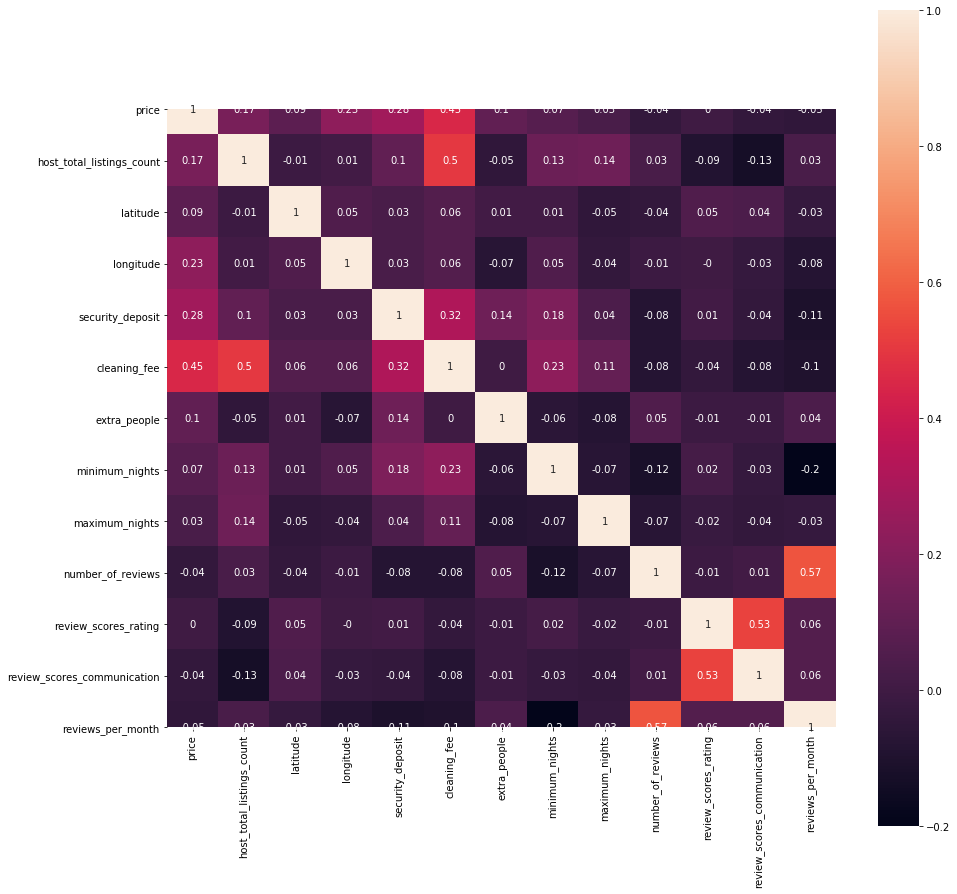

In [37]:
plt.figure(figsize=(15,15))
corr=round(air_df.corr(),2)
sns.heatmap(corr, square=True, annot=True)
plt.show()

variables like cleaning_fee, security_deposite and longitude shows good correlation with the price.
We also see a lot of correlation between host_total_listing_conts and cleaning_fee,
and also no. of review and reviews per month are correlated

longitude: correlation with price signifies that price are also dependent on location.

In [38]:
num_col=[]
correlation=[]
for x in air_df.select_dtypes(('float64', 'int64')):
    if x!='Id':
        if x!='price':
            corr=round(air_df['price'].corr(air_df[x]),2)
            correlation.append(corr)
            num_col.append(x)
    

In [39]:
corr_table=pd.DataFrame({'columns': num_col, 'correlation':correlation})
corr_table.sort_values(by='correlation', ascending=False)

,columns,correlation
4,cleaning_fee,0.45
3,security_deposit,0.28
2,longitude,0.23
0,host_total_listings_count,0.17
5,extra_people,0.10
1,latitude,0.09
6,minimum_nights,0.07
7,maximum_nights,0.03
9,review_scores_rating,0.00
8,number_of_reviews,-0.04


from the table we can see that variables hotel_total_listings_counts, extra_people too are slightly correlated with the target variable 

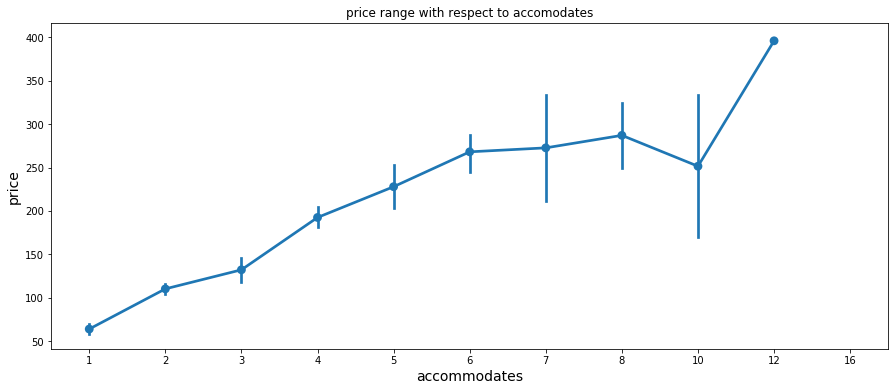

In [54]:
plt.figure(figsize=(15,6))
sns.pointplot(x='accommodates', y='price', data=air_df)
plt.title('price range with respect to accomodates')
plt.ylabel('price', fontsize=14)
plt.xlabel('accommodates', fontsize=14)
plt.show()

 We see a gradual increase in price as the no. of accommodates increases. but there is dip in price when the accomodates are 10 and 16. lets check why is there a price such a steep drop for 16 accommodates

In [57]:
sixteen_acc=air_df[air_df['accommodates']==16]
sixteen_acc.T

,429
price,44
host_is_superhost,f
host_total_listings_count,3
host_identity_verified,f
latitude,-33.8909
longitude,151.237
property_type,House
room_type,Shared room
accommodates,16
bathrooms,3


16 accommodates:  it’s a house with a single bedroom, 3 bathrooms and 8 beds which is supposed to be shared hence there is fall in the price for 16 accommodates.

We see that this observation is not adding much information to the  data, but tweaking the price is a very undesirable way. so it better we drop this particular observation

In [52]:
air_df=air_df[air_df.accommodates!=16]

In [55]:
b_group=['bathrooms', 'bedrooms', 'beds']  # groupig the three variables for better visualization

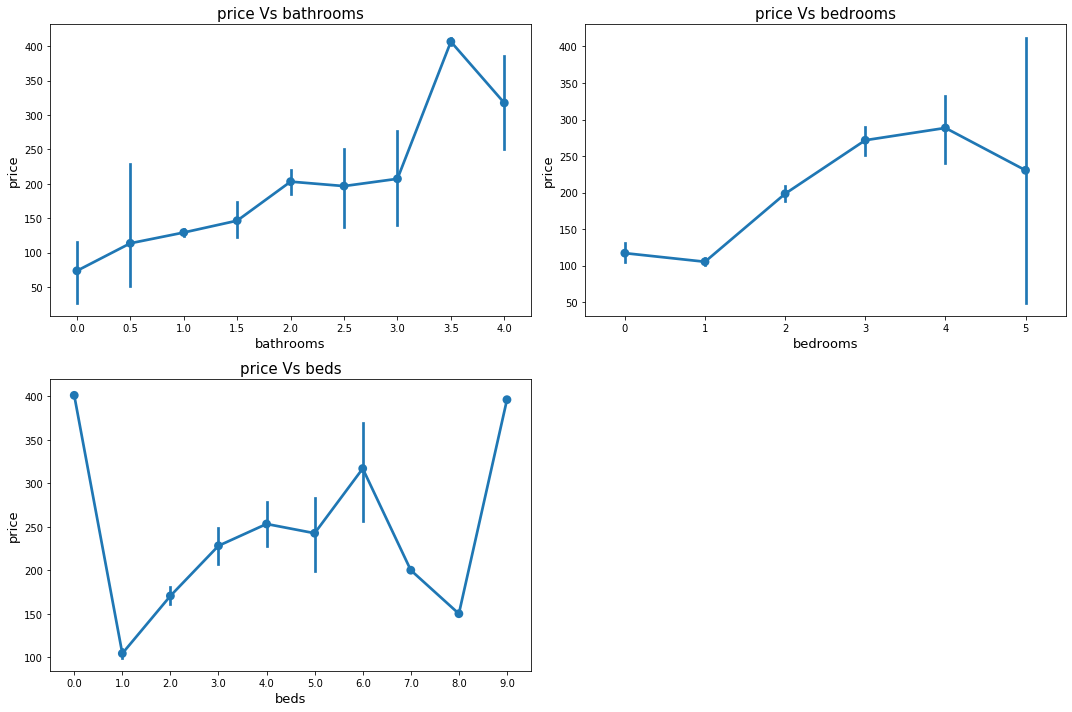

In [56]:
plt.figure(figsize=(15,10))
n=1
for var in b_group:
    plt.subplot(2,2,n)
    sns.pointplot(x=var, y='price', data=air_df)
    plt.ylabel('price', fontsize=13)
    plt.xlabel(var, fontsize=13)
    plt.title('price Vs ' + var, fontsize=15)
    plt.tight_layout()
    n=n+1
plt.show()

price increases with increase in the no. of bedrooms and bathrooms. 

beds: price of bed increase gradually when from 1 bed to 6 beds, 7 and 8 beds price slows down. where as the price of 0 bed and 9 beds are quite high

In [57]:
payments=['cleaning_fee', 'security_deposit']  #grouping two variables for better visualization and comparison

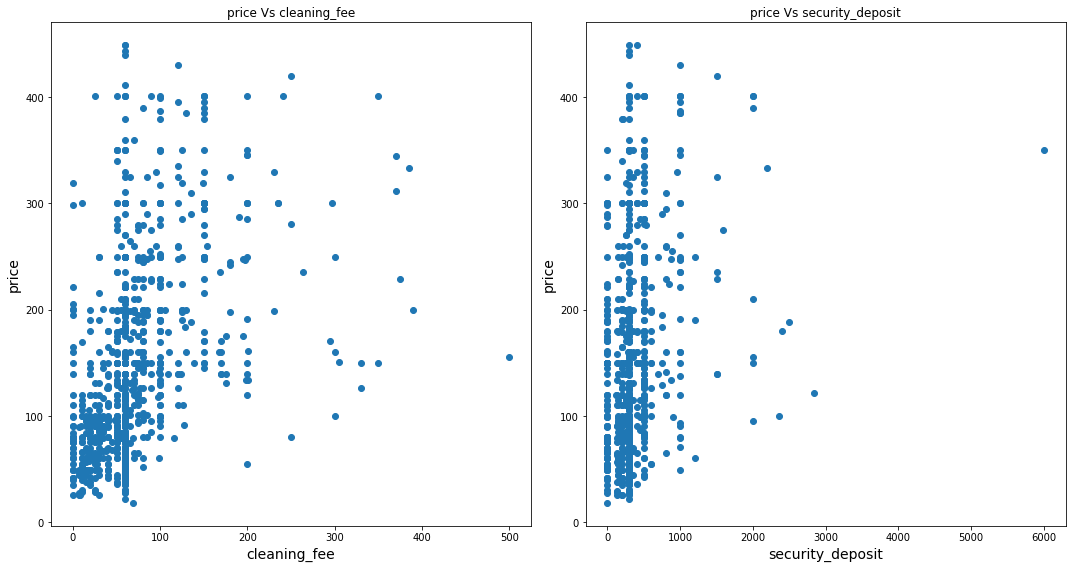

In [58]:
plt.figure(figsize=(15,8))
n=1
for pay in payments:
    plt.subplot(1,2,n)
    plt.scatter(air_df[pay], air_df['price'])
    plt.xlabel(pay, fontsize=14)
    plt.ylabel('price', fontsize=14)
    n=n+1
    plt.title('price Vs ' + pay)
    plt.tight_layout()
plt.show()

Cleaning Fee:  we notice that the most of hotel cleaning fee below 100 has night charges below 200.
security deposit: We can see an outlier here with 6000 as security fee. we will remove this outlier feature engineering section.

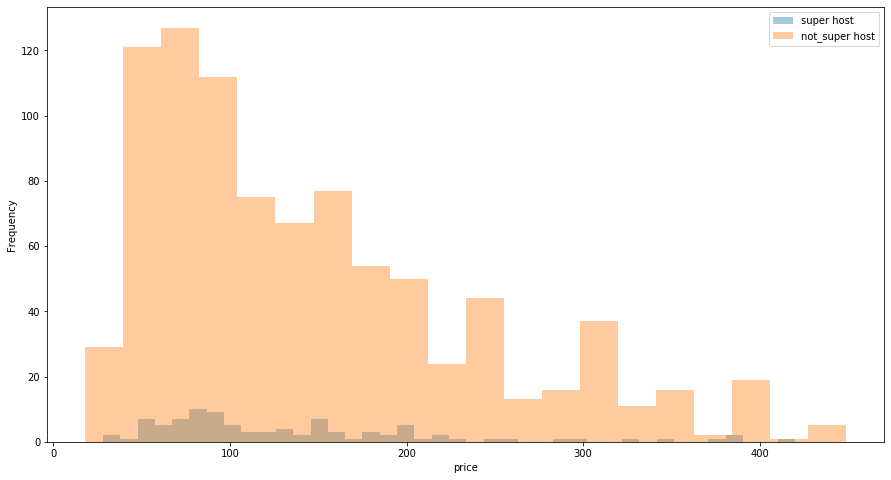

In [59]:
plt.figure(figsize=(15,8))
super_host=air_df[air_df['host_is_superhost']=='t']
no_super_host=air_df[air_df['host_is_superhost']=='f']
plt.subplot(1,1,1)
sns.distplot(super_host['price'], kde=False, bins=40, label='super host')
sns.distplot(no_super_host['price'], kde=False, bins=20, label='not_super host') 
plt.ylabel('Frequency')
plt.legend()
plt.show()


we see that both super_host and nto_super_host have same price distribution. i.e. the price for both super_host and not a super host are right skewed  

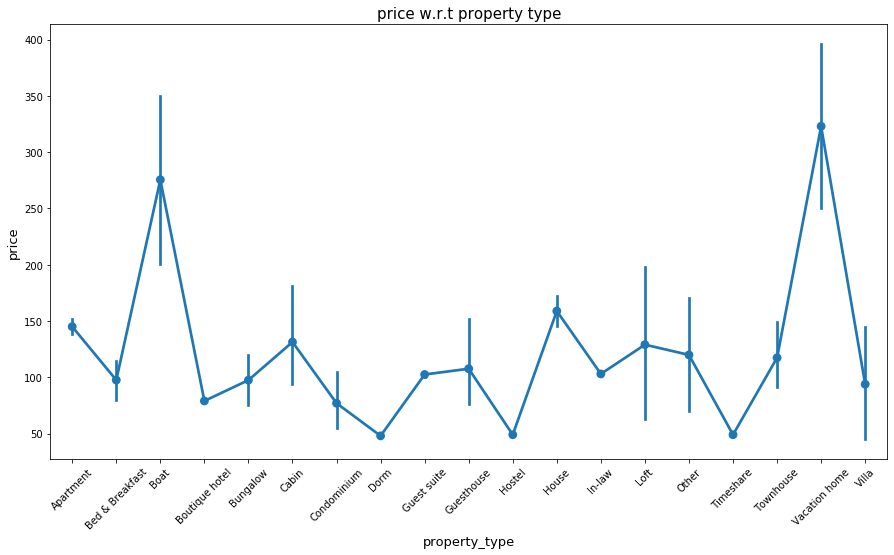

In [62]:
plt.figure(figsize=(15,8))
chart=sns.pointplot(x='property_type', y='price', data=air_df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.xlabel('property_type', fontsize=13)
plt.ylabel('price', fontsize=13)
plt.title('price w.r.t property type', fontsize=15)
plt.show()

We can see the properties like boat and vacation homes have expensive stays, where as hostel and timeshare have very economical stays

In [81]:
property=air_df['property_type'].unique()
property

[Apartment, House, Guest suite, Other, Townhouse, ..., In-law, Boat, Boutique hotel, Cabin, Hostel]
Length: 19
Categories (19, object): [Apartment, House, Guest suite, Other, ..., Boat, Boutique hotel, Cabin, Hostel]

In [67]:
#plt.figure(figsize=(15,20))
property=air_df['property_type'].unique()
for prop in property:
    
    

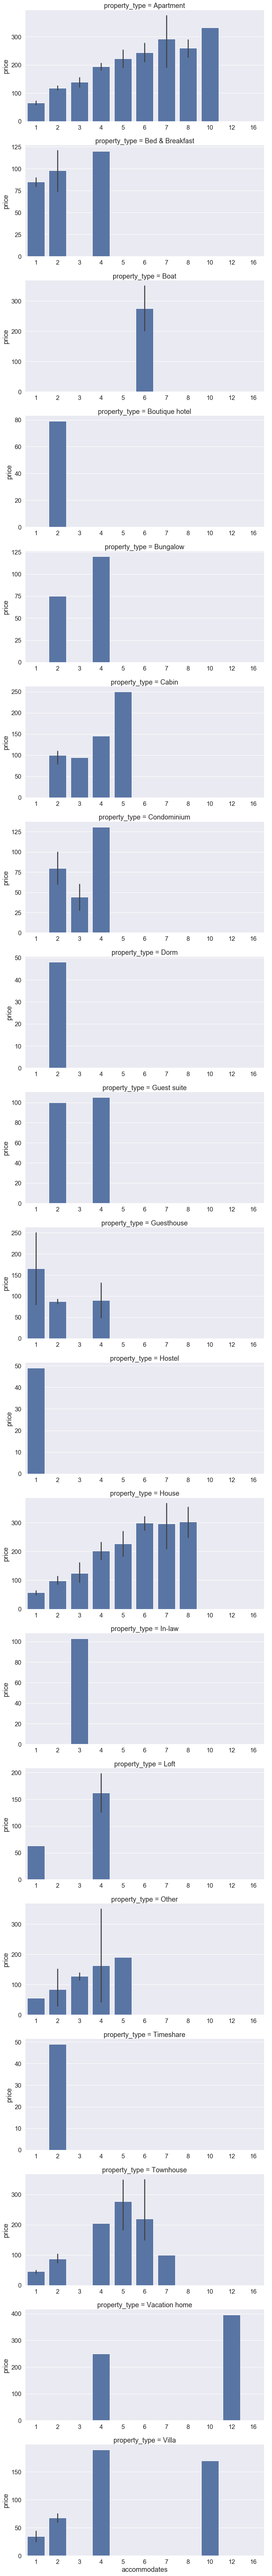

In [113]:
sns.set(font_scale=1.5)
FacetGrid=sns.FacetGrid(air_df,row='property_type', height=5, aspect=2, sharex=False, sharey=False)
FacetGrid.map(sns.barplot,'accommodates', 'price', order=None, hue_order=None)
sns.set(font_scale=2)
FacetGrid.add_legend()
plt.show()


####### We notice that properties like 
Boat and vacation home- price range is very high with fewer accomodation
villa, town house, house, cabin and appratment has accommodation ranging from 1to 10 at a price range 50 to 200.


In [87]:
def bi_variate(data, col1, col2):
        cross_tab=pd.crosstab(air_df[col1], air_df[col2])
        #print(cross_tab)
        plt.figure(figsize=(50,20))
        cross_tab.plot.bar(stacked=True)
        plt.xlabel('{}'.format(col1), fontsize=12)
        plt.ylabel('{}'.format(col2), fontsize=12)
        plt.title('{} Vs price'.format(col1))
        plt.xticks(rotation=45)
        plt.show()
        return cross_tab

<Figure size 3600x1440 with 0 Axes>

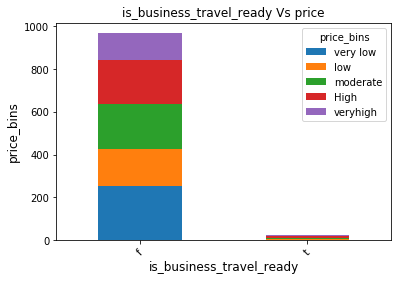

price_bins,very low,low,moderate,High,veryhigh
is_business_travel_ready,,,,,
f,251,176,208,208,126
t,0,3,7,10,4


In [88]:
bi_variate(air_df, 'is_business_travel_ready', 'price_bins')

from the above graph we can infer that the price for business purpose stay falls between moderate to high range.

<Figure size 3600x1440 with 0 Axes>

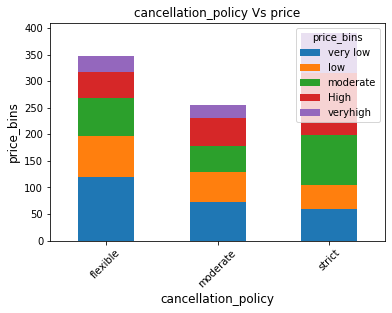

price_bins,very low,low,moderate,High,veryhigh
cancellation_policy,,,,,
flexible,119,78,71,49,30
moderate,72,57,49,53,25
strict,60,44,95,116,75


In [89]:
bi_variate(air_df, 'cancellation_policy', 'price_bins')

from the above plot we can learn that the price range increase as the cancellation policy moves form flexible to strict

In [115]:
from gmplot import gmplot # importng gmplot for plotting geolocation

In [116]:
center_lat=air_df['latitude'].mean()
center_long=air_df['longitude'].mean()
zoom=15

In [123]:
gmap=gmplot.GoogleMapPlotter(center_lat, center_long, zoom)
gmap.scatter(air_df['latitude'], air_df['longitude'])
gmap.draw('D:\\Datascience\\air_bnb-price.html')

No handles with labels found to put in legend.


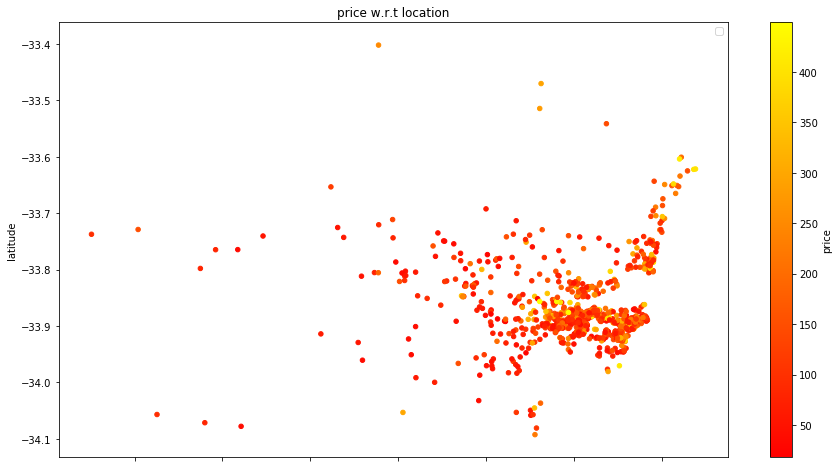

In [162]:
air_df.plot(kind='scatter',x='longitude',y='latitude', c='price',figsize=(15,8), colorbar=True, alpha=1, cmap='autumn')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('price w.r.t location')
plt.legend()
plt.show()

In [ ]:
# Plot it using geo locations, makes reader correlate well

the price also depends on the location of the stay

### Feature -Engineering

Step:9 categorical- level check

first lets sort categorical variable property_type 

In [163]:
air_df['property_type'].value_counts() # checking the no. of levels in the property_type variable 

Apartment          641
House              248
Townhouse           31
Other               11
Bed & Breakfast      9
Guesthouse           8
Condominium          7
Cabin                6
Villa                5
Loft                 3
Vacation home        2
Guest suite          2
Bungalow             2
Boat                 2
In-law               1
Hostel               1
Dorm                 1
Boutique hotel       1
Timeshare            1
Name: property_type, dtype: int64

In [164]:
n=air_df['property_type'].value_counts().index[:2]        #We'll reduce the no. of labels in the variable
air_df['property_type']=air_df.property_type.where(air_df.property_type.isin(n),'other')
air_df['property_type'].value_counts()

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Implicitly converting categorical to object-dtype ndarray. One or more of the values in 'other' are not present in this categorical's categories. A future version of pandas will raise a ValueError when 'other' contains different categories.

To preserve the current behavior, add the new categories to the categorical before calling 'where', or convert the categorical to a different dtype.
  


Apartment    641
House        248
other         93
Name: property_type, dtype: int64

In [165]:
air_df['property_type']=air_df['property_type'].astype('category')

now, we will deal with the outlier of the security deposit

In [166]:
(air_df['security_deposit'].values>3000).sum()

1

In [167]:
air_df=air_df[air_df['security_deposit']<3000]

step 10: Scaling Numeric Feautres

In [168]:
from sklearn.preprocessing import MinMaxScaler

In [169]:
air_df=air_df.drop(['latitude', 'longitude', 'Id'], axis=1) #lets drop longitude and latitude from the data set

In [170]:
air_df.isnull().sum()

price                          0
host_is_superhost              0
host_total_listings_count      0
host_identity_verified         0
property_type                  0
room_type                      0
accommodates                   0
bathrooms                      0
bedrooms                       0
beds                           0
security_deposit               0
cleaning_fee                   0
extra_people                   0
minimum_nights                 0
maximum_nights                 0
number_of_reviews              0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
instant_bookable               0
is_business_travel_ready       0
cancellation_policy            0
reviews_per_month              0
dtype: int64

In [171]:
numeric_col=[]
for col in air_df.select_dtypes(('float64', 'int64')): 
    numeric_col.append(col)

In [172]:
numeric_col

['price',
 'host_total_listings_count',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'security_deposit',
 'cleaning_fee',
 'extra_people',
 'minimum_nights',
 'maximum_nights',
 'number_of_reviews',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'reviews_per_month']

In [173]:
numeric=air_df.loc[:,numeric_col]
nums=np.round(MinMaxScaler().fit_transform(numeric),2)
numeric=pd.DataFrame(nums,columns=numeric_col)
numeric.shape

(981, 20)

step:11 encoding for categorical variables

In [174]:
from sklearn.preprocessing import LabelEncoder #importing Label Encoder library
le=LabelEncoder()

In [175]:
cat_col=[]
for col in air_df.select_dtypes('category'):     #grouping the categorical column
    cat_col.append(col)

In [176]:
cat=air_df.loc[:,cat_col]

In [177]:
for col in cat.columns:
    cat[col]=le.fit_transform(cat[col].astype('str'))   #label encoding the different levels of a categorical variables

In [178]:
cat.shape

(981, 7)

In [179]:
Air_Df=pd.concat([numeric,cat], axis=1)

In [180]:
Air_Df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 27 columns):
price                          981 non-null float64
host_total_listings_count      981 non-null float64
accommodates                   981 non-null float64
bathrooms                      981 non-null float64
bedrooms                       981 non-null float64
beds                           981 non-null float64
security_deposit               981 non-null float64
cleaning_fee                   981 non-null float64
extra_people                   981 non-null float64
minimum_nights                 981 non-null float64
maximum_nights                 981 non-null float64
number_of_reviews              981 non-null float64
review_scores_rating           981 non-null float64
review_scores_accuracy         981 non-null float64
review_scores_cleanliness      981 non-null float64
review_scores_checkin          981 non-null float64
review_scores_communication    981 non-null float64
review_sco

In [181]:
Air_Df=Air_Df.dropna(axis=0) 

We notice that the outlier that we removed have reappeared as 'NAN' in the concated dataset so we shall drop those 'NAN' values along zero axis

### Modelling 

Model1:Linear Regression

In [186]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

now lets split the data set into train and test

In [187]:
x=Air_Df.drop('price',axis=1)
y=Air_Df['price']                        #splitting the x-feature and y-target

In [188]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=1)

In [189]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(769, 26)
(193, 26)
(769,)
(193,)


In [ ]:
# Explain the above print statement well 

In [190]:
linreg=LinearRegression()
model1=linreg.fit(x_train,y_train)     #fitting Linear Regression to x_train, y_train

In [191]:
y_pred=model1.predict(x_test)     #Predicting

In [192]:
result=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
result.head()

,Actual,Predicted
245,0.24,0.211613
868,0.19,0.221997
538,0.14,0.367094
975,0.17,0.226860
350,0.14,0.165518


In [193]:
from sklearn import metrics #importing metrics

In [194]:
MSE=metrics.mean_squared_error(y_test,y_pred)
RMSE=np.sqrt(MSE)
print('Root mean squared error:',RMSE)

Root mean squared error: 0.1394709879277106


In [195]:
r_sq=metrics.r2_score(y_test,y_pred)
print('R_squared error:',r_sq)

R_squared error: 0.48161417192542244


the root mean squared and the R_squared do not fall the in the desirable range. this means the model is not doing a good job here.

In [ ]:
# Perform hyper parameter tuning, reduce the error in it.

##### Model2: random Forest

In [196]:
from sklearn.ensemble import RandomForestRegressor

In [211]:
rand=RandomForestRegressor(n_estimators=100, min_samples_leaf=5, max_depth=20)

In [212]:
rand.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [213]:
pred_rand=rand.predict(x_test)

In [214]:
result=pd.DataFrame({'Actual':y_test, 'Predicted':pred_rand})
result.head()

,Actual,Predicted
245,0.24,0.265203
868,0.19,0.188240
538,0.14,0.490852
975,0.17,0.165490
350,0.14,0.126531


In [216]:
RMSE=np.sqrt(metrics.mean_squared_error(y_test,pred_rand))
print('RMSE:', np.round(RMSE,2))

RMSE: 0.14


root mean squared error is 0.14, this means on an averange our prediction is 0.14 $ away from the actual price

In [219]:
score=rand.score(x_train,y_train)
print('random forest score:', np.round(score,2))
print('percentage:',np.round(score*100,2),'%')

random forest score: 0.73
percentage: 73.26 %


The Random Forest model is doing a very good job over 0.73 is a good score. its giving us 73% accuracy

In [220]:
importance=rand.feature_importances_

In [221]:
feature_imp=pd.DataFrame({'columns':x_test.columns,'importances':np.round(importance,2)})
feature_imp.sort_values(by='importances', ascending=False)

,columns,importances
1,accommodates,0.50
6,cleaning_fee,0.11
3,bedrooms,0.10
5,security_deposit,0.04
2,bathrooms,0.03
8,minimum_nights,0.03
7,extra_people,0.02
9,maximum_nights,0.02
10,number_of_reviews,0.02
18,reviews_per_month,0.02


From the above table it is evident that Accommodates, bedrooms and cleaning fee are the most significant variables 

In [ ]:
# Try to implement Lasso and Ridge regression
# Use stats model as well